# GMM and EM
Gaussian Mixture Models and Expectation Maximization  

Here we show canned and homgrown implementations.

## Using a library call
Follow tutorial in [mastery](https://machinelearningmastery.com/expectation-maximization-em-algorithm/)

Use [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) class GaussianMixture.

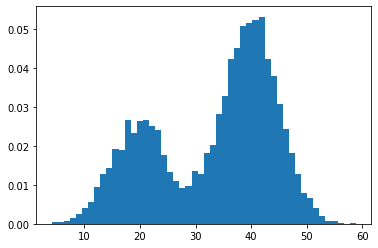

In [8]:
# Straight from the Mastery site.
# Construct a bimodal from two Gaussian processes.
from numpy import hstack
from numpy.random import normal
from matplotlib import pyplot
# normal ( mean, standard deviation, count )
def plot(X1,X2):
    X = hstack( (X1, X2) )  # horizontal stack i.e. concat
    pyplot.hist(X, bins=50, density=True)
    pyplot.show()
X1 = normal(loc=20, scale=5, size=3000) 
X2 = normal(loc=40, scale=5, size=6000)
plot(X1,X2)

In [9]:
def show_gmm(model):
    print(model)
    for i in range(model.n_components):
        print('Gaussian',i,'mean=',model.means_[i],
            'wgt=',model.weights_[i], 
            'Cov=',model.covariances_[i])

In [10]:
# Straight from the Mastery site.
# Use EM to reverse engineer the model i.e. fit a GMM to the data.
from sklearn.mixture import GaussianMixture
X = hstack( (X1, X2) ) 
X = X.reshape((len(X), 1))
# By default, covariance=‘full’: each component has its own general covariance matrix.
# Use 'spherical' (one variance per mean) since our data has only one feature.
# By default, init_params='kmeans'. Works much better than 'random'!
model = GaussianMixture(n_components=2, verbose=1, covariance_type='spherical')
model.fit(X)
show_gmm(model)

Initialization 0
Initialization converged: True
GaussianMixture(covariance_type='spherical', n_components=2, verbose=1)
Gaussian 0 mean= [19.90665747] wgt= 0.3344511357135007 Cov= 25.248074096497877
Gaussian 1 mean= [40.01071329] wgt= 0.6655488642865003 Cov= 25.223305196742448


In [11]:
yhat = model.predict(X)
print('Predicted class of a point on the left:',yhat[100])
print('Predicted class of a point on the right:',yhat[-100])

Predicted class of a point on the left: 0
Predicted class of a point on the right: 1


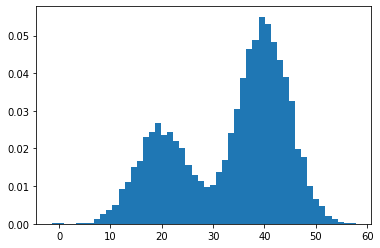

In [12]:
mean0=model.means_[0]
mean1=model.means_[1]
G0 = normal(loc=mean0, scale=5, size=3000) 
G1 = normal(loc=mean1, scale=5, size=6000)
if mean0>mean1:
    G0 = normal(loc=mean0, scale=5, size=6000) 
    G1 = normal(loc=mean1, scale=5, size=3000)
plot(G0,G1)

## Homegrown version

In [54]:
import scipy.stats as ss
import numpy as np
def is_closer(point,this_mean,that_mean):
    return abs(point-this_mean) < abs(point-that_mean)
def sse(vector,mean):
    err=vector-mean
    se=np.square(err)
    sse=sum(se)
    return int(sse)
def assign_probs(mean,stdev,data):
    dist = ss.norm(mean,stdev)
    probs=np.asarray([dist.pdf(x) for x in data])
    return probs
def recompute_means(clust1,clust2):
    mean1=np.mean(clust1)
    mean2=np.mean(clust2)
    print('Means:',mean1,mean2)
    return mean1,mean2
def iterative_2_means_delta(mean1,mean2,data,delta):
    stdev1=np.std(data)
    stdev2=np.std(data)
    probs1=assign_probs(mean1,stdev1,data)
    probs2=assign_probs(mean2,stdev2,data)
    print('probs')
    print(probs1)
    print(probs2)
    weights1=np.zeros(len(data))
    weights2=np.zeros(len(data))
    weighted1=np.zeros(len(data))
    weighted2=np.zeros(len(data))
    for i in range(len(data)):
        p1=probs1[i]
        p2=probs2[i]
        weights1[i]=p1/p2
        weights2[i]=p2/p1
        weighted1[i]=data[i]*weights1[i]
        weighted2[i]=data[i]*weights2[i]
    print('weights')
    print(weights1)
    print(weights2)
    print('weighted')
    print(weighted1)
    print(weighted2)
    mean1=sum(weighted1)/sum(weights1)
    mean2=sum(weighted2)/sum(weights2)
    return mean1,mean2

In [55]:
X1 = normal(loc=20, scale=5, size=3) # size=3000) 
X2 = normal(loc=40, scale=5, size=3) # size=6000)
guess1 = 20
guess2 = 40
X = hstack( (X1, X2) ) 
X = X.reshape((len(X), 1))
X = np.asarray(X)
print('Data',X)
print('Initial means:',guess1,guess2)
mean1,mean2=iterative_2_means_delta(guess1,guess2,X,0.01)
print('Final means:',mean1,mean2)


Data [[18.51226248]
 [26.73774525]
 [13.2927098 ]
 [45.07066551]
 [40.06657397]
 [53.46652969]]
Initial means: 20 40
probs
[[0.02747264]
 [0.02477178]
 [0.0247961 ]
 [0.00612434]
 [0.01052282]
 [0.00188611]]
[[0.0091342 ]
 [0.0181197 ]
 [0.0049988 ]
 [0.02596838]
 [0.02761845]
 [0.01788416]]
weights
[3.00766621 1.36711888 4.960408   0.23583844 0.38100686 0.10546256]
[0.3324837  0.73146529 0.20159632 4.24019089 2.62462464 9.48203755]
weighted
[55.67870639 36.5536763  65.9372641  10.6293954  15.26563965  5.63871735]
[  6.15502558  19.55773246   2.67976138 191.10822526 105.15971734
 506.9716422 ]
Final means: 18.861882280769205 47.21856080464579
